# Example of variance decomposition

### Irving Gomez Mendez

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from tabulate import tabulate

In [2]:
sss = pd.DataFrame(np.array([[-74, 80, 18, -56, -112],
    [14, -69, 21, 52, 104],
    [66, -72, -5, 764, 1528],
    [-12, 66, -30, 4096, 8192],
    [3, 8, -7, -13276, -26552],
    [4, -12, 4, 8421, 16842]]))

np.linalg.cond(sss)

3.939707969283431e+16

In [10]:
sss

,0,1,2,3,4
0,-74,80,18,-56,-112
1,14,-69,21,52,104
2,66,-72,-5,764,1528
3,-12,66,-30,4096,8192
4,3,8,-7,-13276,-26552
5,4,-12,4,8421,16842


<AxesSubplot:>

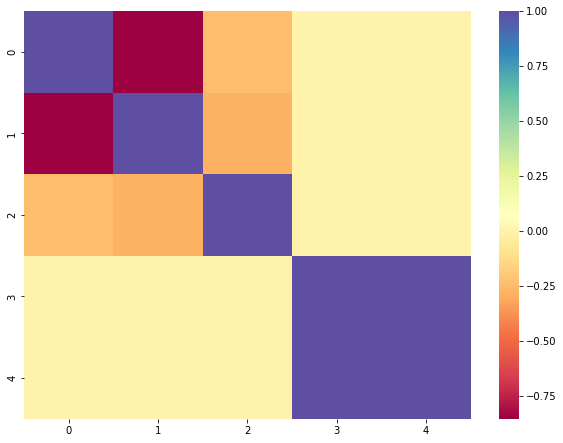

In [9]:
# matriz de correlacion
corr_matrix = pd.DataFrame(sss).corr()

corr_matrix.style.format(precision=4).background_gradient(cmap='Spectral', axis=None).to_excel('prueba.xlsx', engine='openpyxl')

plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix, cmap='Spectral')

In [4]:
# factores de inflacion de la varianza
# vifs mayores a 5 pueden indicar colinealidad
vif = pd.DataFrame()
vif["VIF_Factor"] = np.round([variance_inflation_factor(sss.values, i) for i in range(sss.shape[1])],2)
vif["features"] = sss.columns
vif

# Para exportar la tabla de VIFs a latex
#print(tabulate(vif, vif.columns, tablefmt="latex"))

/home/dmitri/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,features
0,55.68,0
1,57.17,1
2,16.53,2
3,inf,3
4,inf,4


In [5]:
# Descomposicion SVD
u, d, vt = np.linalg.svd(sss)
v = vt.T

# valores singulares
d

array([36368.40448796,   170.70133054,    60.53318792,     7.60190176,
           0.        ])

In [6]:
d[4]

9.231243729614967e-13

In [7]:
# indices de condicionamiento
d[0]/d

array([1.00000000e+00, 2.13052847e+02, 6.00801077e+02, 4.78411924e+03,
       3.93970797e+16])

<AxesSubplot:>

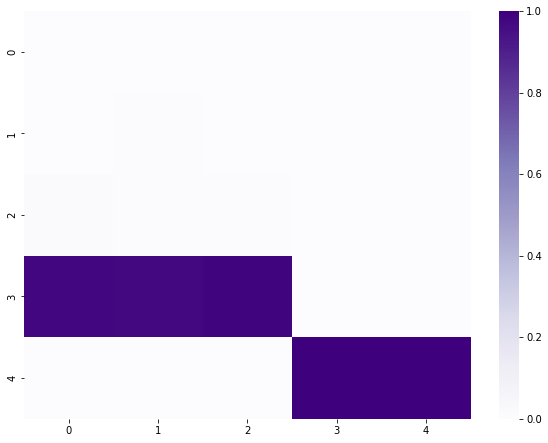

In [8]:
# analisis de descomposicion de la varianza
phis = v**2/d**2
var_decomp_portions = phis.T/sum(phis.T)

pd.DataFrame(var_decomp_portions).style.background_gradient(cmap='Purples', axis=None)

plt.figure(figsize=(10,7.5))
sns.heatmap(var_decomp_portions, cmap='Purples')